# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [115]:
if not os.path.exists("lut.py"):
        !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

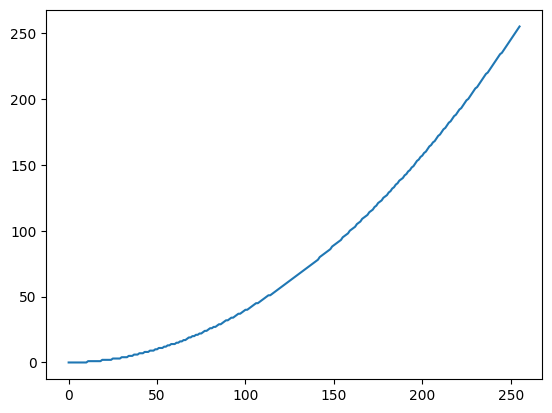

In [116]:
import lut

plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

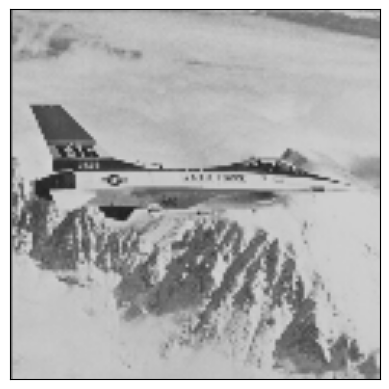

In [117]:
if not os.path.exists("jet.bmp"):
        !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

jet = cv2.imread("jet.bmp")
plt.imshow(jet)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

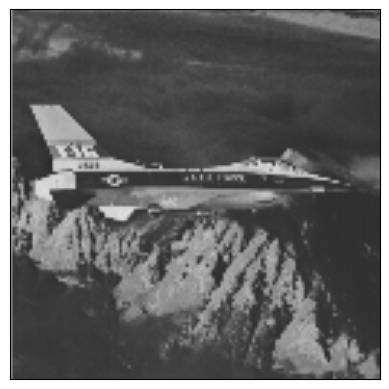

In [118]:
jet_lut = cv2.LUT(jet, lut.odwrotna)
plt.imshow(jet_lut)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [119]:
def LUT(img: np.ndarray, lut_table: np.ndarray):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        ax1.plot(lut_table)
        ax1.set_title("Tablica przekodowania")
        ax1.set_aspect('equal')
        ax2.set_xticks([]), ax2.set_yticks([])
        ax2.set_title("Obraz oryginalny")
        ax2.imshow(img)
        ax3.set_xticks([]), ax3.set_yticks([])
        ax3.set_title("Obraz po przekodowaniu")
        ax3.imshow(cv2.LUT(img, lut_table))
        plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

logarytmiczna


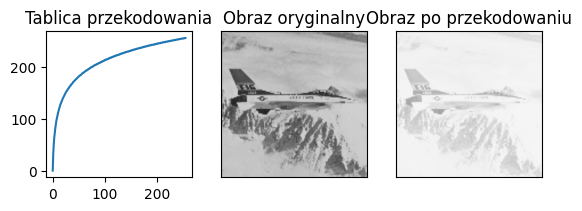

piłokształtna


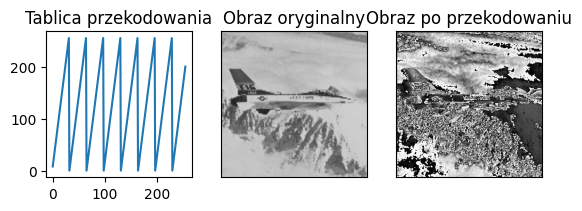

odwrotna logarytmiczna


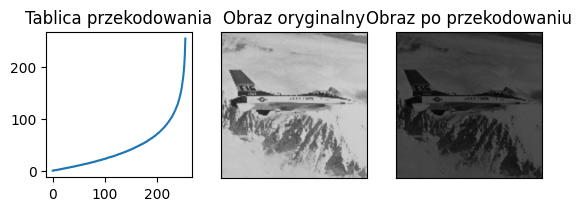

wykładnicza


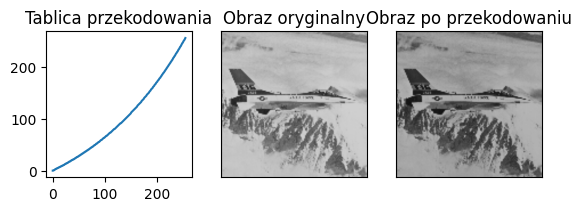

kwadratowa


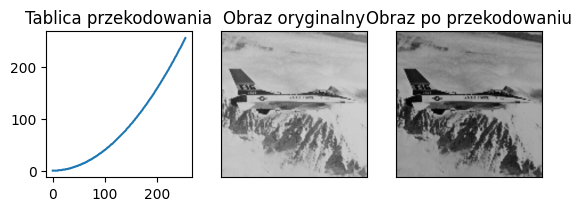

odwrotna


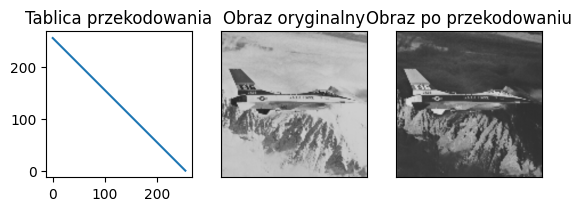

pierwiastkowa


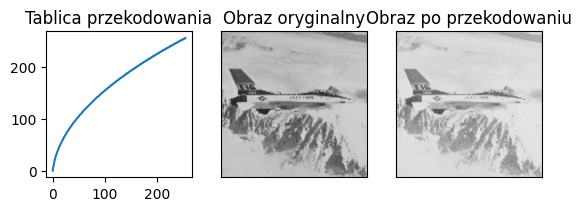

In [120]:
print("logarytmiczna")
LUT(jet, lut.log)
print("piłokształtna")
LUT(jet, lut.pila)
print("odwrotna logarytmiczna")
LUT(jet, lut.odwlog)
print("wykładnicza")
LUT(jet, lut.wykladnicza)
print("kwadratowa")
LUT(jet, lut.kwadratowa)
print("odwrotna")
LUT(jet, lut.odwrotna)
print("pierwiastkowa")
LUT(jet, lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

In [121]:
if not os.path.exists("lena.bmp"):
        !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

lena = cv2.imread("lena.bmp")

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

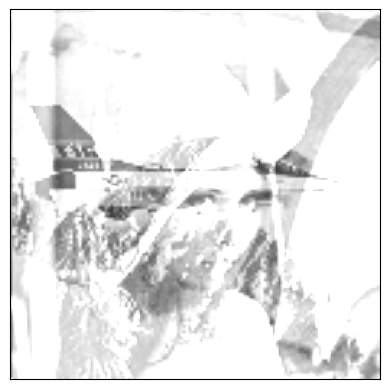

In [122]:
img_sum = cv2.add(jet, lena)
plt.imshow(img_sum)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

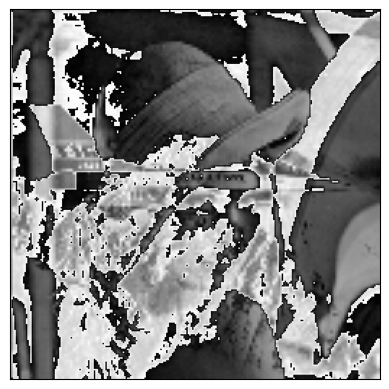

In [123]:
img_sum = cv2.add(jet.astype('uint16'), cv2.imread("lena.bmp").astype('uint16'))
img_sum = img_sum.astype('uint8')
plt.imshow(img_sum)
plt.xticks([]), plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

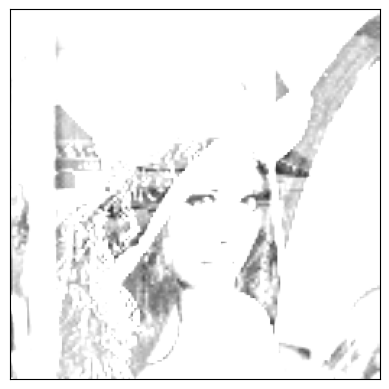

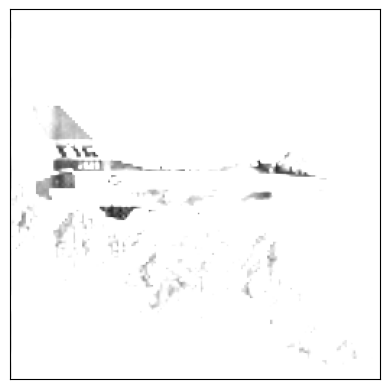

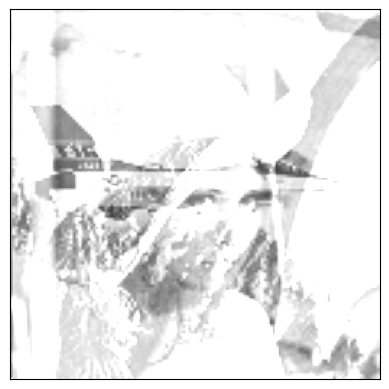

In [124]:
img_wsum = cv2.addWeighted(lena, 3, jet, 1, -50)
plt.imshow(img_wsum)
plt.xticks([]), plt.yticks([])
plt.show()

img_wsum = cv2.addWeighted(lena, 1, jet, 3, -100)
plt.imshow(img_wsum)
plt.xticks([]), plt.yticks([])
plt.show()

img_wsum = cv2.addWeighted(lena, 1, jet, 1, 5)
plt.imshow(img_wsum)
plt.xticks([]), plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

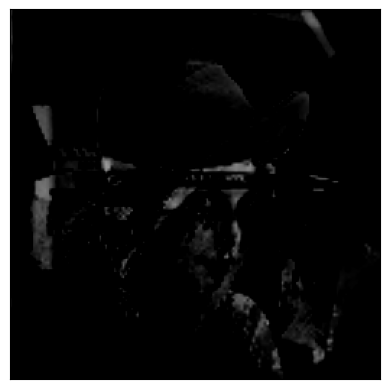

In [125]:
img_diff = cv2.subtract(lena, jet)
plt.imshow(img_diff)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?
Dzięki temu bierzemy pod uwagę liczby ujemne

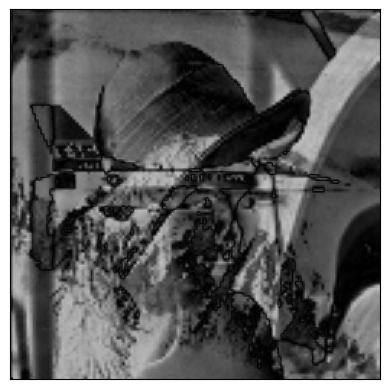

In [126]:
img_diff = cv2.subtract(lena.astype('int16'), jet.astype('int16'))
img_diff = np.abs(img_diff).astype('uint8')
plt.imshow(img_diff)
plt.xticks([]), plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?
Pomnożone wartości są duże i przekraczają 255.


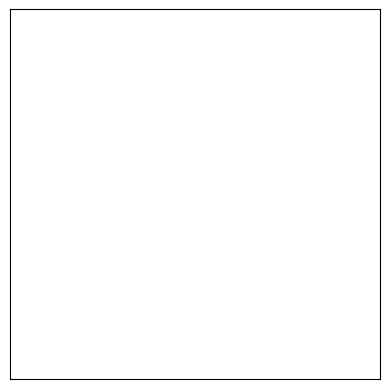

In [127]:
img_diff = cv2.multiply(lena, jet)
plt.imshow(img_diff)
plt.xticks([]), plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

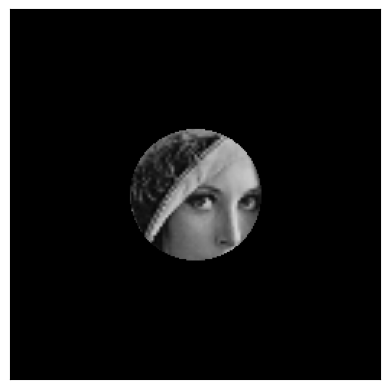

In [128]:
if not os.path.exists("kolo.bmp"):
        !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

kolo = cv2.imread('kolo.bmp')
mask = kolo.astype('bool').astype('uint8')

mask_lena = cv2.multiply(lena, mask)
plt.imshow(mask_lena)
plt.xticks([]), plt.yticks([])
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

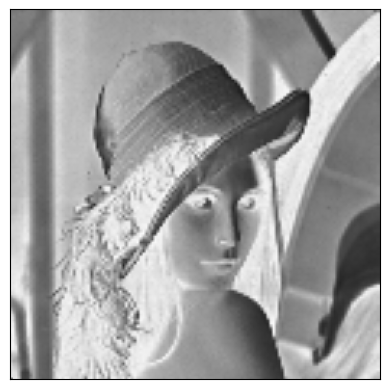

In [129]:
odw_lena = cv2.bitwise_not(lena)
plt.imshow(odw_lena)
plt.xticks([]), plt.yticks([])
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

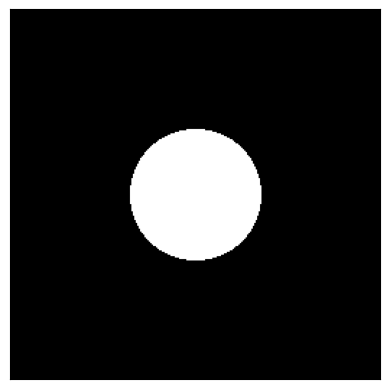

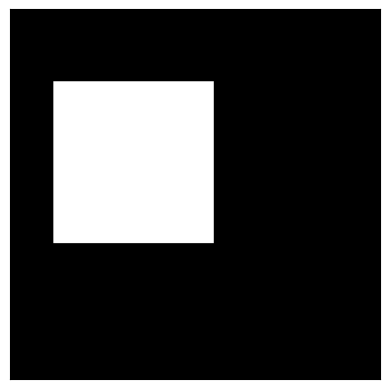

In [130]:
if not os.path.exists("kwadrat.bmp"):
        !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kwadrat = cv2.imread('kwadrat.bmp')

for img in [kolo, kwadrat]:
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])
        plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

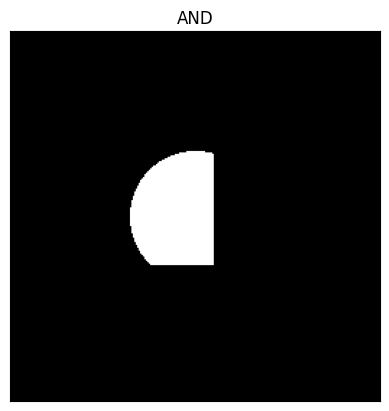

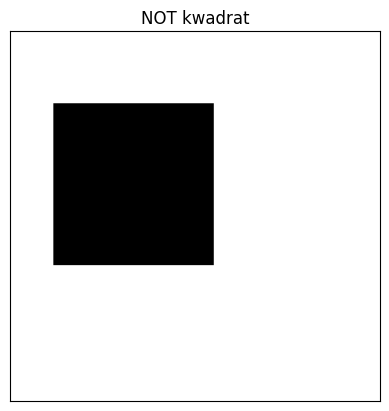

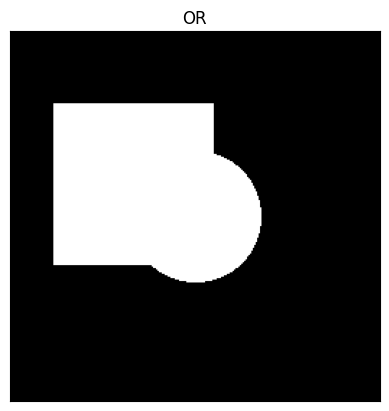

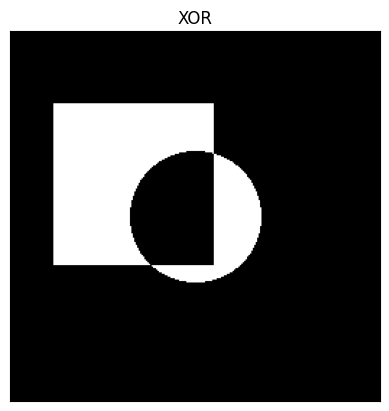

(Text(0.5, 1.0, 'XOR'), None)

In [131]:
plt.imshow(kolo & kwadrat), plt.xticks([]), plt.yticks([])
plt.title("AND"), plt.show()
plt.imshow(~kwadrat), plt.xticks([]), plt.yticks([])
plt.title("NOT kwadrat"), plt.show()
plt.imshow(kolo | kwadrat), plt.xticks([]), plt.yticks([])
plt.title("OR"), plt.show()
plt.imshow(kolo ^ kwadrat), plt.xticks([]), plt.yticks([])
plt.title("XOR"), plt.show()